In [767]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [768]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [769]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [770]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)
df['ph'].fillna(df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)
df.isna().sum()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


-----------------------------ph------------------------------


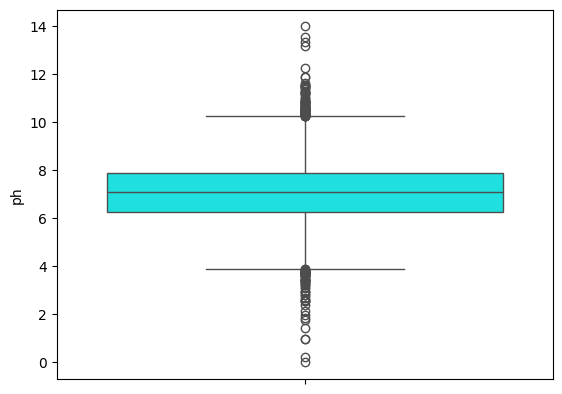

-----------------------------Hardness------------------------------


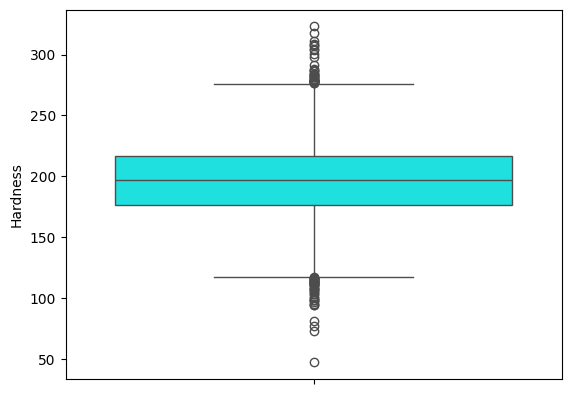

-----------------------------Solids------------------------------


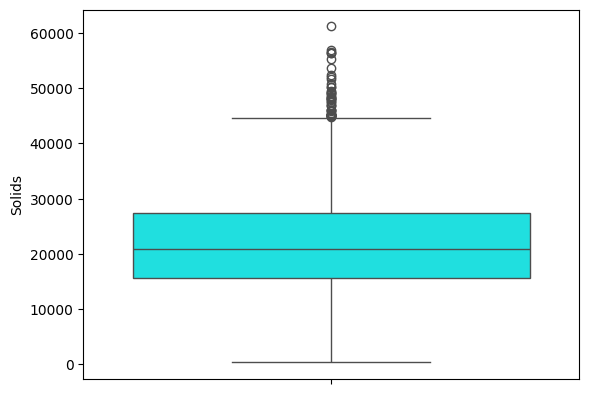

-----------------------------Chloramines------------------------------


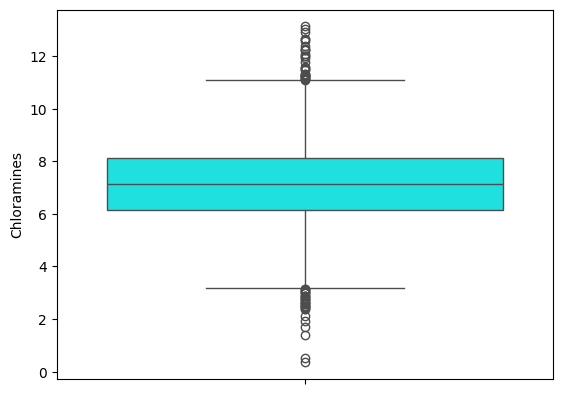

-----------------------------Sulfate------------------------------


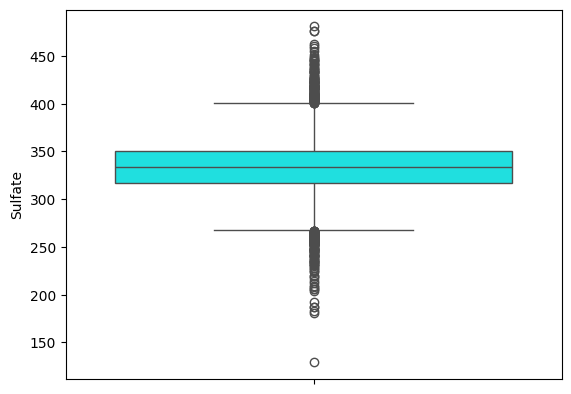

-----------------------------Conductivity------------------------------


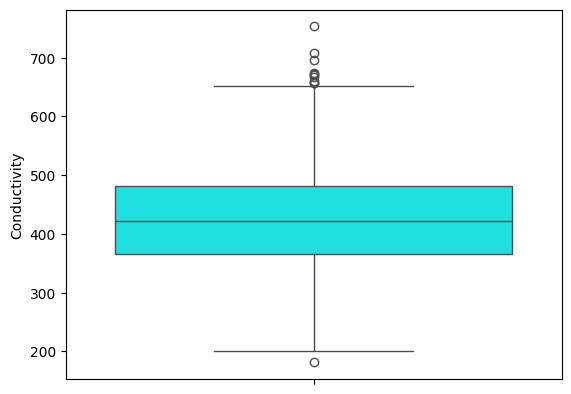

-----------------------------Organic_carbon------------------------------


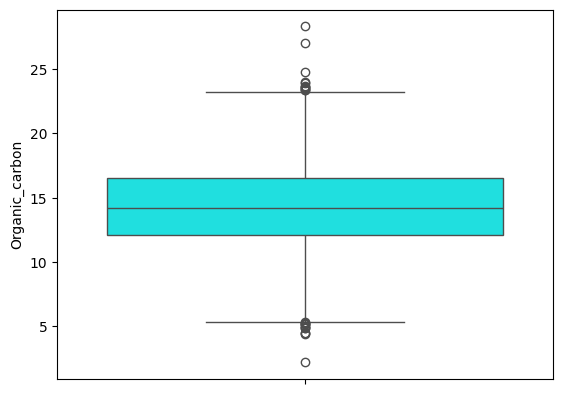

-----------------------------Trihalomethanes------------------------------


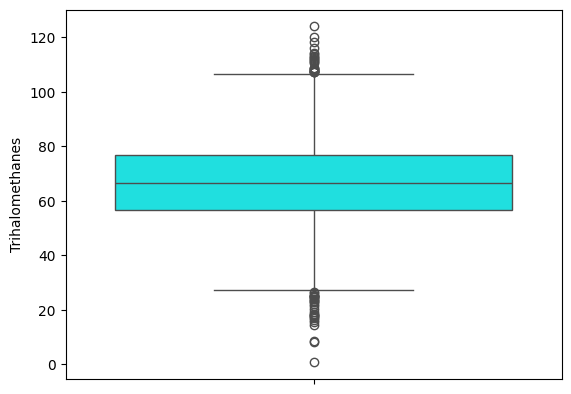

-----------------------------Turbidity------------------------------


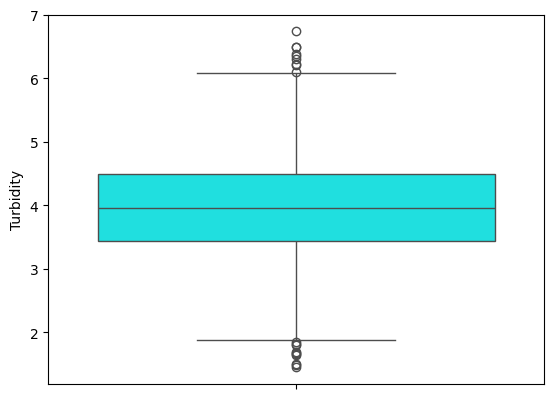

-----------------------------Potability------------------------------


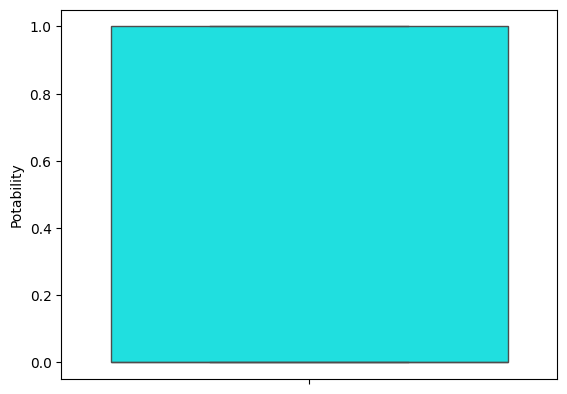

In [771]:
for i in df.columns:
    print(f'-----------------------------{i}------------------------------')
    sns.boxplot(df[i],color='aqua')
    plt.show()

In [772]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

lower = (q1-1.5*iqr)
upper = (q3+1.5*iqr)


df = df[~((df < lower) | (df > upper)).any(axis=1)]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [773]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

-----------------------------ph------------------------------


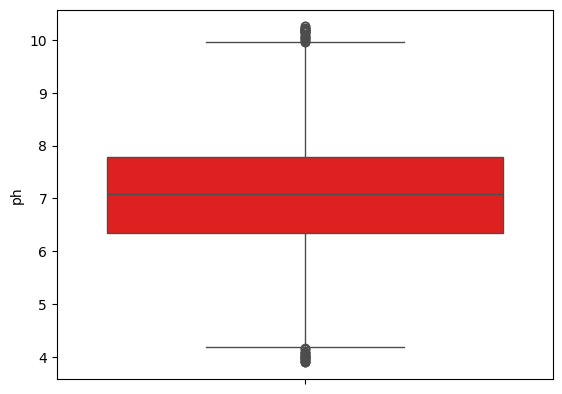

-----------------------------Hardness------------------------------


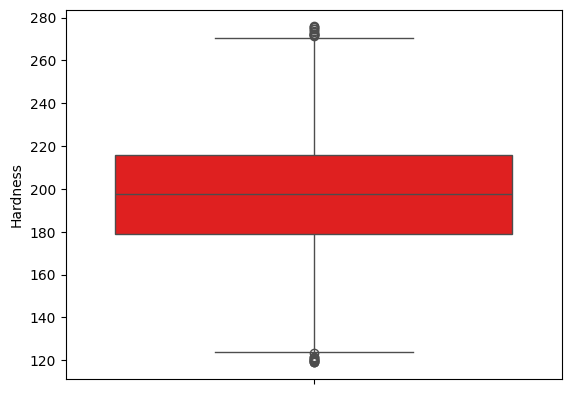

-----------------------------Solids------------------------------


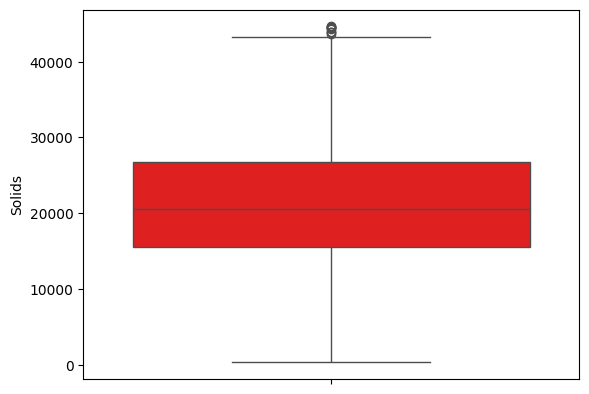

-----------------------------Chloramines------------------------------


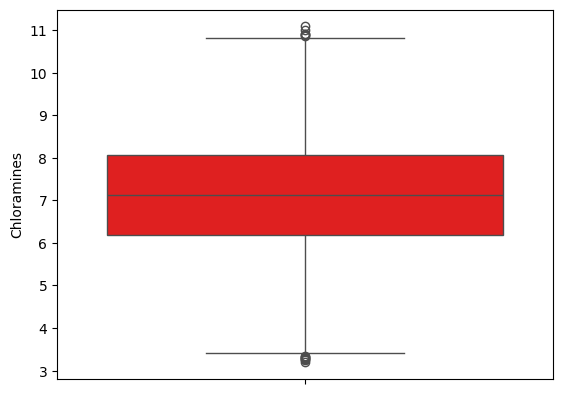

-----------------------------Sulfate------------------------------


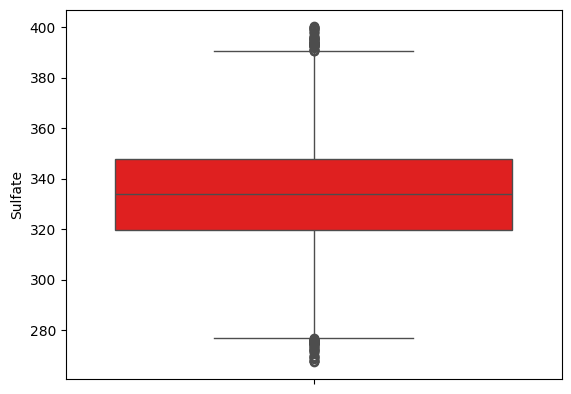

-----------------------------Conductivity------------------------------


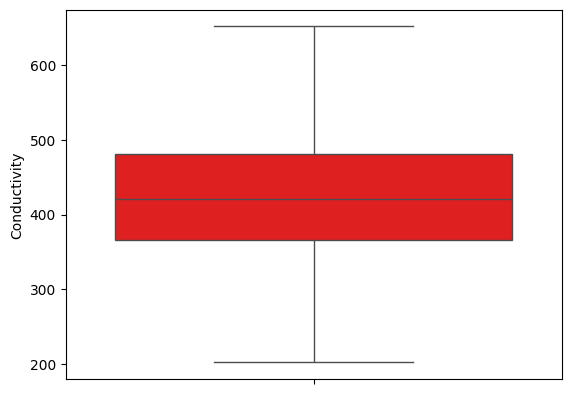

-----------------------------Organic_carbon------------------------------


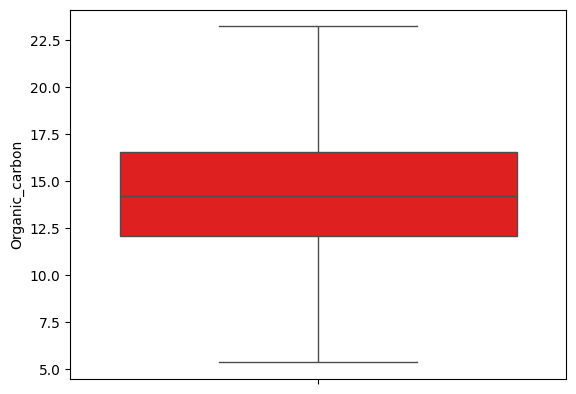

-----------------------------Trihalomethanes------------------------------


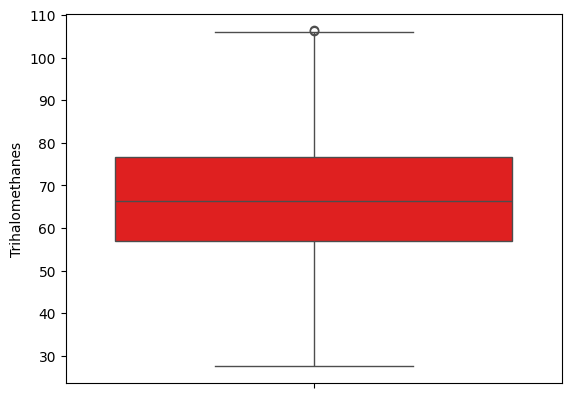

-----------------------------Turbidity------------------------------


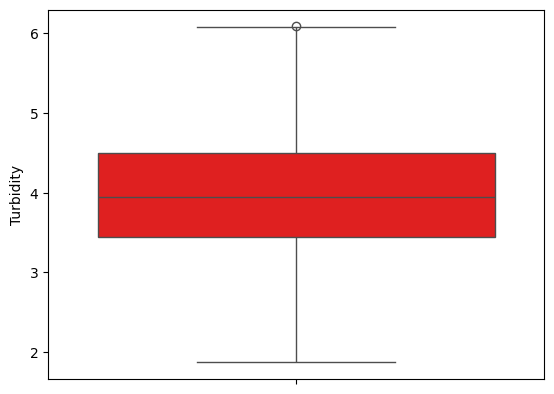

-----------------------------Potability------------------------------


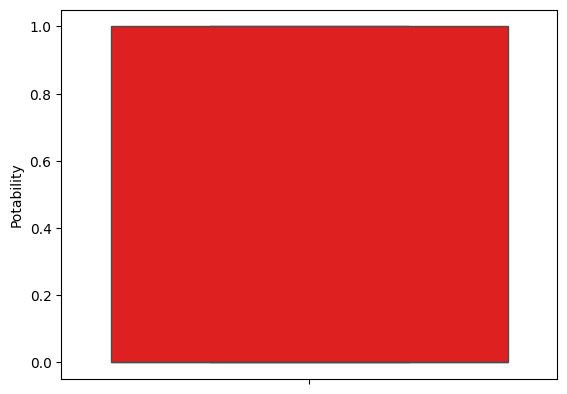

In [774]:
for i in df.columns:
    print(f'-----------------------------{i}------------------------------')
    sns.boxplot(df[i],color='r')
    plt.show()

In [775]:
(df['Potability'] == 0).value_counts()

Potability
True     1671
False     995
Name: count, dtype: int64

<Axes: >

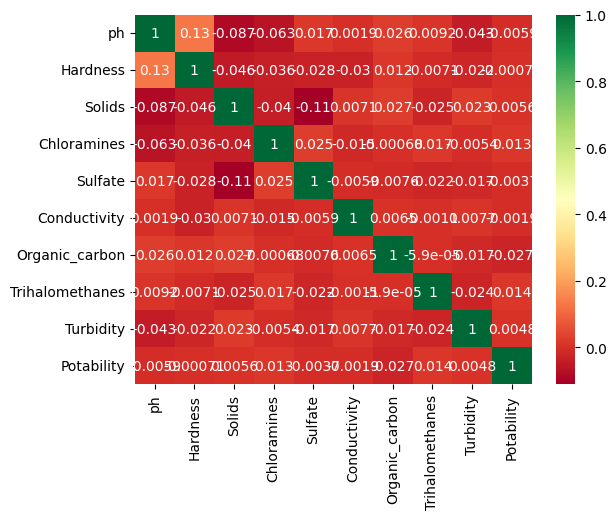

In [776]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [777]:
y = df.pop("Potability")
dfx = df

In [778]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [779]:
dfx_train,dfx_test,y_train,y_test = train_test_split(dfx,y,test_size=0.2,random_state=42)

In [780]:
std.fit(dfx_train)
x_train = std.transform(dfx_train)
x_test = std.transform(dfx_test)

In [781]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.623358348968105
0.6404494382022472


In [782]:
[lr.coef_,dfx.columns]

[array([[-0.00156297,  0.00583209,  0.0280929 ,  0.02589528,  0.02474545,
          0.01490961, -0.02874258,  0.02601835, -0.00719089]]),
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
       dtype='object')]

In [783]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.6909005628517824
0.6292134831460674


In [784]:
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(x_train,y_train)

print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))


0.7645403377110694
0.6385767790262172


In [785]:
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.01)
ada.fit(x_train,y_train)

print(ada.score(x_train,y_train))
print(ada.score(x_test,y_test))

0.6280487804878049
0.6404494382022472


In [786]:
xgb =XGBClassifier(n_estimators=1000,gamma=0.9,reg_alpha=0.7,reg_lambda=0.6,learning_rate=0.1,random_state=100)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [787]:
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.7922138836772983
0.6797752808988764


In [788]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=42,oob_score=True)
rfc.fit(x_train,y_train)

print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.7828330206378987
0.6610486891385767


In [789]:
train_pred = xgb.predict(x_train)
test_pred = xgb.predict(x_test)

<Axes: >

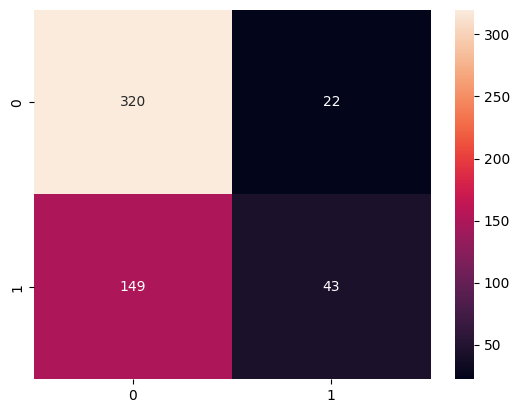

In [790]:
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt='0.0f')

In [792]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       342
           1       0.66      0.22      0.33       192

    accuracy                           0.68       534
   macro avg       0.67      0.58      0.56       534
weighted avg       0.67      0.68      0.63       534



In [797]:
print("The best accuracy for this data is from XGBoost Classifier and the accuacy is ",accuracy_score(y_test,test_pred)*100,"%")

The best accuracy for this data is from XGBoost Classifier and the accuacy is  67.97752808988764 %
